# warped manifold transformation
The SFH basis coefficients should add up to 1. In order to impose this, we want to sample the coefficients $\{\beta\}$ from a Dirichlet prior distribution. In practice, to sample $\{\beta\}$, we first sample $\{\beta'\}$ from a uniform prior then use a warped manifold transformation (Betancourt 2013) to transform $\beta'$ to $\beta$. 

In this notebook I examine how the Dirichlet prior propagates to SFR

In [1]:
import os, h5py
import numpy as np 
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

variables $\beta'_1, \beta'_2, \beta'_3, \beta'_4$ before warped manifold transformation

In [3]:
bp1 = np.random.uniform(size=10000)
bp2 = np.random.uniform(size=10000)
bp3 = np.random.uniform(size=10000)
bp4 = np.random.uniform(size=10000)

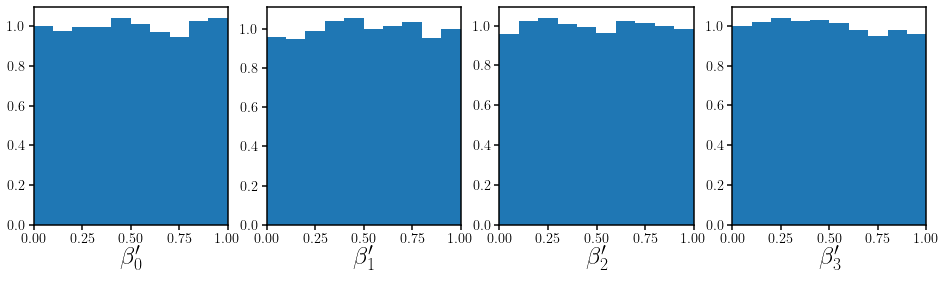

In [4]:
fig = plt.figure(figsize=(16,4))
for i, _x in enumerate([bp1, bp2, bp3, bp4]): 
    sub = fig.add_subplot(1,4,i+1)
    sub.hist(_x, density=True)
    sub.set_xlim(0., 1)
    sub.set_xlabel(r"$\beta'_{%i}$" % i, fontsize=25)

Now lets transformed $\beta'$s to $\beta$ using the warped manifold transform 

In [5]:
ispec = Fitters.iSpeculator()

In [6]:
beta_arr = ispec._transform_to_SFH_basis(np.array([bp1, bp2, bp3, bp4]).T)

In [7]:
b1, b2, b3, b4 = beta_arr.T

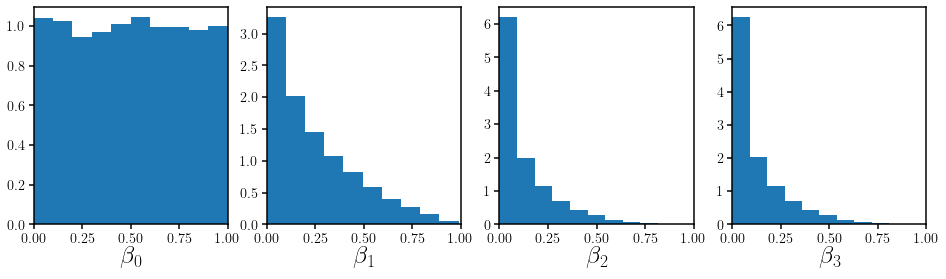

In [8]:
fig = plt.figure(figsize=(16,4))
for i, _y in enumerate([b1, b2, b3, b4]): 
    sub = fig.add_subplot(1,4,i+1)
    sub.hist(_y, density=True)
    sub.set_xlim(0., 1)
    sub.set_xlabel(r'$\beta_{%i}$' % i, fontsize=25)

In [9]:
print(b1+b2+b3+b4)

[1. 1. 1. ... 1. 1. 1.]


As expected $\beta$s add up to 1

# SSFR prior distribution from Dirichlet priors
Now lets see how the prior distribution propagates to SSFR over 1 Gyr and 0.1 Gyr

In [10]:
ssfr_1gyr = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.1, dt=1.)
ssfr_100myr = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.1, dt=0.1)

logssfr_1gyr = np.log10(ssfr_1gyr)
logssfr_100myr = np.log10(ssfr_100myr)

ssfr_1gyr_z0p2 = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.2, dt=1.)
ssfr_100myr_z0p2 = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.2, dt=0.1)

logssfr_1gyr_z0p2 = np.log10(ssfr_1gyr_z0p2)
logssfr_100myr_z0p2 = np.log10(ssfr_100myr_z0p2)

(-11.0, -8.0)

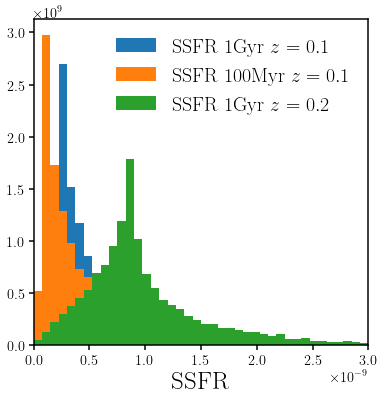

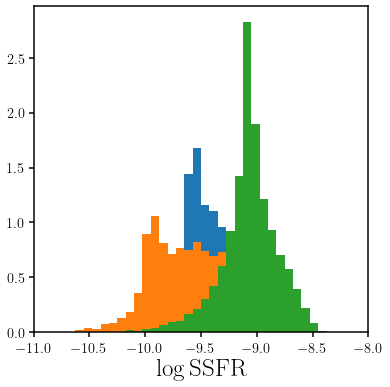

In [11]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.hist(ssfr_1gyr,  range=[0, 3e-9], bins=40, density=True, label='SSFR 1Gyr $z=0.1$')
sub.hist(ssfr_100myr,  range=[0, 3e-9], bins=40, density=True, color='C1', label='SSFR 100Myr $z=0.1$')
sub.hist(ssfr_1gyr_z0p2,  range=[0, 3e-9], bins=40, density=True, color='C2', label='SSFR 1Gyr $z=0.2$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'${\rm SSFR}$', fontsize=25)
sub.set_xlim(0, 3e-9)

fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.hist(logssfr_1gyr, range=[-11, -8], bins=40, density=True)
sub.hist(logssfr_100myr, range=[-11, -8], bins=40,density=True, color='C1')
sub.hist(logssfr_1gyr_z0p2,  range=[-11, -8], bins=40, density=True, color='C2')
sub.set_xlabel(r'$\log {\rm SSFR}$', fontsize=25)
sub.set_xlim(-11, -8)

**The Dirichlet prior imposes a gnarly prior on both ${\rm SSFR}$ and $\log {\rm SSFR}$ that is a function of $z$**. 

This prior is imposed on the SFH and likely biases the posteriors! This is related to what Joel Leja found.

## What if we decided to ditch the Dirichlet priors? 

In [12]:
bp1 = np.random.uniform(size=10000)
bp2 = np.random.uniform(size=10000)
bp3 = np.random.uniform(size=10000)
bp4 = np.random.uniform(size=10000)

In [13]:
ssfr_1gyr_notrans = ispec.get_SFR(np.array([np.ones(len(bp1)), bp1, bp2, bp3, bp4]), 0.1, dt=1.)
ssfr_100myr_notrans = ispec.get_SFR(np.array([np.ones(len(bp1)), bp1, bp2, bp3, bp4]), 0.1, dt=0.1)

logssfr_1gyr_notrans = np.log10(ssfr_1gyr_notrans)
logssfr_100myr_notrans = np.log10(ssfr_100myr_notrans)

ssfr_1gyr_z0p2_notrans = ispec.get_SFR(np.array([np.ones(len(bp1)), bp1, bp2, bp3, bp4]), 0.2, dt=1.)
ssfr_100myr_z0p2_notrans = ispec.get_SFR(np.array([np.ones(len(bp1)), bp1, bp2, bp3, bp4]), 0.2, dt=0.1)

logssfr_1gyr_z0p2_notrans = np.log10(ssfr_1gyr_z0p2_notrans)
logssfr_100myr_z0p2_notrans = np.log10(ssfr_100myr_z0p2_notrans)

(-11.0, -8.0)

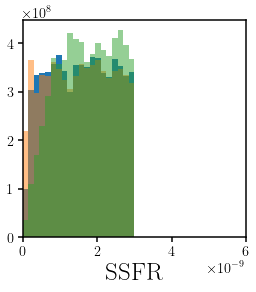

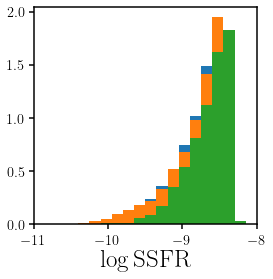

In [17]:
fig = plt.figure(figsize=(4,4))
sub = fig.add_subplot(111)
sub.hist(ssfr_1gyr_notrans,  range=[0, 3e-9], bins=20, density=True, label='SSFR 1Gyr  $z=0.1$')
sub.hist(ssfr_100myr_notrans,  range=[0, 3e-9], bins=20, density=True, color='C1', alpha=0.5, label='SSFR 100Myr $z=0.1$')
sub.hist(ssfr_1gyr_z0p2_notrans,  range=[0, 3e-9], bins=20, density=True, color='C2', alpha=0.5, label='SSFR 1Gyr $z=0.2$')

#sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'${\rm SSFR}$', fontsize=25)
sub.set_xlim(0, None)

fig = plt.figure(figsize=(4,4))
sub = fig.add_subplot(111)
sub.hist(logssfr_1gyr_notrans, range=[-11, -8], bins=20, density=True)
sub.hist(logssfr_100myr_notrans, range=[-11, -8], bins=20,density=True, color='C1')
sub.hist(logssfr_1gyr_z0p2_notrans, range=[-11, -8], bins=20,density=True, color='C2')

sub.set_xlabel(r'$\log {\rm SSFR}$', fontsize=25)
sub.set_xlim(-11, -8)

With uniform (rather than Dirichlet) priors on the SFH basis coefficients, the prior imposed on SSFR is more uniform. However, it's still skewed. 